Import the necessary libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import the necessary data frames

In [103]:
cab= pd.read_csv('C:/Users/Daisy/Desktop/data glacier/Cab_Data.csv')
city=pd.read_csv('C:/Users/Daisy/Desktop/data glacier/City.csv')
customer= pd.read_csv('C:/Users/Daisy/Desktop/data glacier/Customer_ID.csv')
transaction =pd.read_csv('C:/Users/Daisy/Desktop/data glacier/Transaction_ID.csv')

In [104]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.63
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.60
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.78


In [105]:
city.head()

,City,Population,Users
0,NEW YORK NY,8405837.0,302149.0
1,CHICAGO IL,1955130.0,164468.0
2,LOS ANGELES CA,1595037.0,144132.0
3,MIAMI FL,1339155.0,17675.0
4,SILICON VALLEY,1177609.0,27247.0


In [106]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [107]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [108]:
#Get the number of rows, columns for each dataset
print ("cab",cab.shape)
print ("transaction",transaction.shape)
print ("customer",customer.shape)


cab (359392, 7)
transaction (440098, 3)
customer (49171, 4)


In [109]:
#Exploration on data relationships:Correlation
#Table below shows a high correlation between the 'price charged' and the 'cost of the trip' and 'KM travelled'
cab_corr=cab.corr()
cab_corr

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462
KM Travelled,-0.001429,1.000000,0.835753,0.981848
Price Charged,-0.052902,0.835753,1.000000,0.859812
Cost of Trip,-0.003462,0.981848,0.859812,1.000000


The next cell visualizes the heatmap for all the variablesin the data set.
From the scale on the right,color red os at 0 meaning it represents weak correlation.
color blue is at 1 meaning it represents strong correlation. 
therefore we can see a strong correlation between Price charged and the KM travelled and the cost of the trip.

<AxesSubplot:>

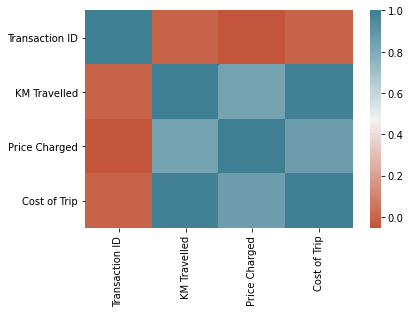

In [110]:
#Visualize the correlation matrix using a heatmap
cab_hm= sns.heatmap(cab_corr
                   ,cmap=sns.diverging_palette(20, 220, n=200))
cab_hm

The next cell will be merging two data sets;Transaction_ID and Cab_Data. the process will be carried out with a full outer merge because the two datasets have a common column:'Transaction ID'.A full outer merge combines both tables without losing any columns.

In [111]:
new=pd.merge(cab, transaction)
new.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,29290,Card
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Card
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.63,28712,Cash
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.60,28020,Cash
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.78,27182,Card


In [112]:
new.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
359387,10440101,08/01/2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,52392,Cash
359388,10440104,04/01/2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,53286,Cash
359389,10440105,05/01/2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,52265,Cash
359390,10440106,05/01/2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,52175,Card
359391,10440107,02/01/2018,Yellow Cab,WASHINGTON DC,12.76,191.58,177.62,52917,Card


We find correlationof the merged dataset

In [113]:
new.corr(method='spearman')

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID
Transaction ID,1.000000,-0.001470,-0.040401,-0.003537,-0.020391
KM Travelled,-0.001470,1.000000,0.892958,0.984546,0.000428
Price Charged,-0.040401,0.892958,1.000000,0.913581,-0.204821
Cost of Trip,-0.003537,0.984546,0.913581,1.000000,-0.009639
Customer ID,-0.020391,0.000428,-0.204821,-0.009639,1.000000


In [114]:
customer.corr(method='pearson')


,Customer ID,Age,Income (USD/Month)
Customer ID,1.000000,-0.006749,-0.006911
Age,-0.006749,1.000000,0.000156
Income (USD/Month),-0.006911,0.000156,1.000000


In [115]:
customer.corr(method='spearman')

,Customer ID,Age,Income (USD/Month)
Customer ID,1.000000,-0.004956,-0.007843
Age,-0.004956,1.000000,0.000552
Income (USD/Month),-0.007843,0.000552,1.000000


Search for and remove null variables

In [116]:
nulls=new.isnull()
nulls

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
359387,False,False,False,False,False,False,False,False,False
359388,False,False,False,False,False,False,False,False,False
359389,False,False,False,False,False,False,False,False,False
359390,False,False,False,False,False,False,False,False,False


In [117]:

new.dropna()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,29290,Card
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Card
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.63,28712,Cash
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.60,28020,Cash
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.78,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,08/01/2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,52392,Cash
359388,10440104,04/01/2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,53286,Cash
359389,10440105,05/01/2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,52265,Cash
359390,10440106,05/01/2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,52175,Card


In [118]:
new.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190185,19191.652115
std,1.268058e+05,12.233526,274.378911,157.993645,21012.412463
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000
75%,1.033094e+07,32.960000,583.660000,413.680000,36078.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000


Add a new column 'profit' to represent the profit made per trip

In [119]:
new['profit']= new['Price Charged']-new['Cost of Trip']
new.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,profit
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,29290,Card,57.31
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Card,23.67
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.63,28712,Cash,27.57
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.60,28020,Cash,25.80
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.78,27182,Card,16.84


In [120]:
Pink_cab_profit=new.query("Company == 'Pink Cab'")['profit'].sum()   
Pink_cab_profit


5307302.97

In [121]:
Yellow_cab_profit= new.query("Company == 'Yellow Cab'")['profit'].sum()
Yellow_cab_profit

44020372.589999996

In [122]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.63
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.60
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.78


In [123]:
print(cab.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB
None


In [124]:
print(cab.shape)

(359392, 7)


In [125]:
print(cab.columns)

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')


In [126]:
cab.loc[100]

Transaction ID          10000111
Date of Travel        05/01/2016
Company                 Pink Cab
City              LOS ANGELES CA
KM Travelled               34.68
Price Charged             720.24
Cost of Trip              398.82
Name: 100, dtype: object

In [127]:
Date_of_Travel=cab.loc[:,'Date of Travel']
Date_of_Travel.head(10)

0    08/01/2016
1    06/01/2016
2    02/01/2016
3    07/01/2016
4    03/01/2016
5    07/01/2016
6    03/01/2016
7    07/01/2016
8    12/01/2016
9    06/01/2016
Name: Date of Travel, dtype: object

In [128]:
user=pd.merge(cab, transaction)
user.head(10)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,29290,Card
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Card
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.63,28712,Cash
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.60,28020,Cash
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.78,27182,Card
5,10000016,07/01/2016,Pink Cab,ATLANTA GA,6.06,72.43,63.02,27318,Cash
6,10000017,03/01/2016,Pink Cab,AUSTIN TX,44.00,576.15,475.20,33788,Card
7,10000018,07/01/2016,Pink Cab,AUSTIN TX,35.65,466.10,377.89,34106,Card
8,10000019,12/01/2016,Pink Cab,BOSTON MA,14.40,191.61,146.88,59799,Cash
9,10000020,06/01/2016,Pink Cab,BOSTON MA,10.89,156.98,113.26,57982,Cash


In [130]:
cost=user.groupby(['Date of Travel'])['Cost of Trip'].sum()
cost = user.set_index(new['Date of Travel'].rename('year').dt.year,append=True).swaplevel(0,1)
print(cost)

AttributeError: Can only use .dt accessor with datetimelike values

In [90]:
cost=company_user.groupby(['Date of Travel'])['Cost of Trip'].sum()
cost

Date of Travel
01/01/2017    257023.89
01/01/2018    103399.89
01/02/2016     28827.01
01/02/2017     31759.84
01/02/2018     46393.63
                ...    
31/10/2017     85098.68
31/10/2018     75206.02
31/12/2016    237145.57
31/12/2017    204008.50
31/12/2018     74636.12
Name: Cost of Trip, Length: 1095, dtype: float64

In [96]:
usergroup=company_user.groupby('City')[['Cost of Trip','Company']].sum()
usergroup

,Cost of Trip
City,
ATLANTA GA,2.137810e+06
AUSTIN TX,1.350442e+06
BOSTON MA,8.591038e+06
CHICAGO IL,1.645401e+07
DALLAS TX,2.013697e+06
DENVER CO,1.064947e+06
LOS ANGELES CA,1.338392e+07
MIAMI FL,1.821835e+06
NASHVILLE TN,8.095767e+05


<AxesSubplot:xlabel='City'>

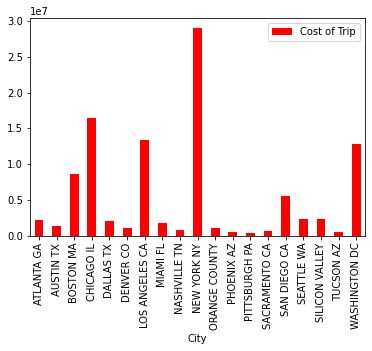

In [97]:
usergroup.plot(kind='bar', color='red')

In [64]:
pink_cab_cost=company_user.query("Company == 'Pink Cab'")['Cost of Trip'].sum()   
pink_cab_cost

21020948.36

In [65]:
yellow_cab_cost= company_user.query("Company == 'Yellow Cab'")['Cost of Trip'].sum()
yellow_cab_cost

81833514.60000001

AttributeError: 'numpy.float64' object has no attribute 'plot'

<AxesSubplot:xlabel='Company'>

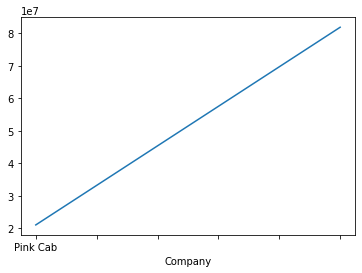

In [56]:
company_user.plot()

In [ ]:
distance_cost=cab.groupby(['Date of Travel'])[['Price Charged','Cost of Trip']].sum()
distance_cost.head(15)

In [6]:
cab.dtypes

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [7]:
city.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [9]:
customer.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [10]:
transaction.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

<AxesSubplot:xlabel='Date of Travel'>

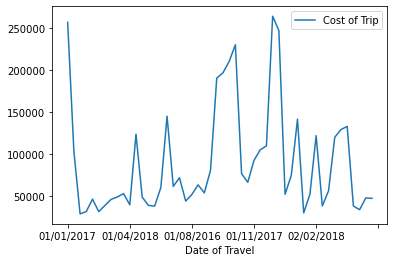

In [170]:
Dist_cost=distance_cost.head(50)
Dist_cost.plot()

In [70]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [76]:
city.loc[:, ['City', 'Population', 'Users']]

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [79]:
city.iloc[:, [1,2]]

,Population,Users
0,"8,405,837","302,149"
1,"1,955,130","164,468"
2,"1,595,037","144,132"
3,"1,339,155","17,675"
4,"1,177,609","27,247"
5,"1,030,185","12,994"
6,"959,307","69,995"
7,"943,999","6,133"
8,"942,908","22,157"
9,"814,885","24,701"


In [86]:
city_users=city.groupby(['City'])['Users'].sum()
city_users

City
ATLANTA GA            24,701 
AUSTIN TX             14,978 
BOSTON MA             80,021 
CHICAGO IL           164,468 
DALLAS TX             22,157 
DENVER CO             12,421 
LOS ANGELES CA       144,132 
MIAMI FL              17,675 
NASHVILLE TN           9,270 
NEW YORK NY          302,149 
ORANGE COUNTY         12,994 
PHOENIX AZ             6,133 
PITTSBURGH PA          3,643 
SACRAMENTO CA          7,044 
SAN DIEGO CA          69,995 
SAN FRANCISCO CA     213,609 
SEATTLE WA            25,063 
SILICON VALLEY        27,247 
TUCSON AZ              5,712 
WASHINGTON DC        127,001 
Name: Users, dtype: object

In [97]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [114]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [122]:
pd.to_numeric(city['Population'])

ValueError: Unable to parse string " 8,405,837 " at position 0

In [130]:
city[['Population'].astype(integer)]
city.dtypes()

AttributeError: 'list' object has no attribute 'astype'

In [87]:
city_users.plot()

TypeError: no numeric data to plot

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
company=new['Company']
Total_Profit= new['profit']
ax.bar(company,Total_Profit)
plt.show()

Plot a line graph showing the linear relationship between kilometers travelled and the price charged per ride for both taxi companies

In [ ]:
#Graph plots
x=new['KM Travelled']
y=new ['Price Charged']
df=(x, y)

#line plots
plt.plot(x,y, color=blue)
plt.legend()
plt.show()
#df=pd.new({new,columns=[KM Travelled], [Price Charged]})

#line plots
#plt.plot([[KM Travelled], [Price Charged], color='blue'])
#plt.legend()
#plt.show()

In [ ]:
#Graph plots
df=pd.new({new,columns=[KM Travelled], [Price Charged]})

#line plots
df.plt.plot([KM Travelled], [Price Charged], color='blue')
plt.legend()
plt.show()

In [ ]:
#df=pd.new({new,columns=[KM Travelled], [Price Charged]})

#line plots
new.plot.line(x='KM Travelled', y='Price Charged', color='blue')
plt.legend()
plt.show()

Perform a data split for x_test,x_train,y_test and y_train, for purposes of outlier detection, linear regression, training and testing.

In [ ]:
import matplotlib as mpl
line=f('Price Charged={intercept} +{slope}KM Travelled, {r})'
plt.plot(Price Charged, intercept + slope * KM Travelled)
plt.show()

Statement of hypothesis="KM travelled Affect the price charged by the cabs"
The above hypothesis is true since the pvalue is 0.

In [ ]:
from sklearn.linear_model import LinearRegression
x= new['KM Travelled']
y=new['Price Charged']
model=scipy.stats.linregress(x, y)
model


In [ ]:
scipy.stats.linRegress(x,y)
y_predict=predict(y)
y_pred

Statement of null hypothesis: "Cost of trip Affect the price charged by the cabs"

In [ ]:
a= new['Cost of Trip']

model3=scipy.stats.linregress(a,y)
model3

In [ ]:
a= new['Cost of Trip']
z=y-a
d=a+z
model3=scipy.stats.linregress(a,d)
model3

In [ ]:
plt.plot(a,d)
plt.show()

Statement ofnull hypothesis:"The Customer ID does not affect the price charged by the cabs"
    The hypothesis was proved true as the pvalue is 0.815832503608265

In [ ]:
b= new['Customer ID']

model4=scipy.stats.linregress(y, b)
model4

In [ ]:
plt.plot(x,y)
plt.show()

Prediction of price charged, based on cost of trip

In [ ]:
a= new['Cost of Trip']

model2=scipy.stats.linregress(y, a)
model2

In [ ]:
model.slope

In [ ]:
model.intercept

In [ ]:
line='y={intercept} +{slope}x, {r}'
line
plt.show(line)

In [ ]:
df= new[['Date of Travel','Cost of Trip','Price Charged']]
df.head()

In [ ]:
df['Date of Travel']=pd.to_datetime(df['Date of Travel'])  
df.head()

In [ ]:
#df.index=df['Date of Travel']
df.plot()


In [ ]:
cab.corr()

